In [1]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.applications import DenseNet121
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam
from PIL import Image
from sklearn.utils import shuffle
import os

In [2]:
ben = os.listdir('D:\ISIC_2019_Training_Input\Melanoma')
mal = os.listdir('D:\ISIC_2019_Training_Input\Basal_cell_carcinoma')

In [3]:
ben = ben[:1000]

In [4]:
len(ben)

1000

In [5]:
mal = mal[:1000]

In [6]:
len(mal)

1000

In [7]:
# Let benign be 0 and malignant be 1
train = []
train_y = []

In [8]:
import cv2
samples_per_category = 100

In [9]:
for i in ben:
    x = 'D:\ISIC_2019_Training_Input\Melanoma' + "\\" + str(i)
    if not os.path.exists(x):
        print(f"Error: Image file '{x}' not found.")
        continue
    img = cv2.cvtColor(cv2.imread(x), cv2.COLOR_BGR2RGB)
    img = cv2.resize(img,(227,227))
    img = img/255 # normalising 
    train.append(img.flatten())
    # train.append(x)
    train_y.append(0)

In [10]:
for i in mal:
    x = 'D:\ISIC_2019_Training_Input\Basal_cell_carcinoma' + "\\" + str(i)
    if not os.path.exists(x):
        print(f"Error: Image file '{x}' not found.")
        continue
    img = cv2.imread(x)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = cv2.resize(img,(227,227))
    img = img/255 # normalising 
    train.append(img.flatten())
    train_y.append(1)

In [11]:
print("Length of images :- ", len(train))
print("Length of lables :- ", len(train_y))

Length of images :-  2000
Length of lables :-  2000


In [12]:
train = np.array(train)

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
train,val,train_y,val_y = train_test_split(train,train_y,test_size=0.2,random_state=44)

In [15]:
train = train.reshape(train.shape[0],227,227,3)

In [16]:
val = val.reshape(val.shape[0],227,227,3)

In [17]:
from sklearn.preprocessing import LabelEncoder

In [18]:
encoder = LabelEncoder()

In [19]:
encoder = encoder.fit(train_y)

In [20]:
train_y = encoder.transform(train_y)

In [21]:
encoder = encoder.fit(val_y)

In [22]:
val_y = encoder.transform(val_y)

In [23]:
print(str('training rows ' + str(len(train))))
print(str('validation rows ' + str(len(val))))

training rows 1600
validation rows 400


In [24]:
model = Sequential()

In [25]:
from tensorflow.keras.applications import Xception
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.callbacks import ReduceLROnPlateau,EarlyStopping

In [26]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(227, 227, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

c:\Users\User\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 225, 225, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 112, 112, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 110, 110, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 55, 55, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 53, 53, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 24, 24, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 12, 12, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 18432)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     9,437,696 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,679,041 (36.92 MB)

 Trainable params: 9,679,041 (36.92 MB)

 Non-trainable params: 0 (0.00 B)

In [27]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [28]:
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True
)

In [29]:
datagen.fit(train)

In [30]:
from keras.callbacks import ModelCheckpoint

In [31]:
checkpoint = ModelCheckpoint('best_model.keras', monitor='val_loss', save_best_only=True, mode='auto')

In [32]:
history = model.fit(
    datagen.flow(train, train_y, batch_size=32),
    epochs=10,
    validation_data=(val, val_y),
    callbacks=[checkpoint]
)

Epoch 1/10


c:\Users\User\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


50/50 ━━━━━━━━━━━━━━━━━━━━ 173s 3s/step - accuracy: 0.6349 - loss: 0.7166 - val_accuracy: 0.7950 - val_loss: 0.4639
Epoch 2/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 151s 3s/step - accuracy: 0.7894 - loss: 0.4520 - val_accuracy: 0.6925 - val_loss: 0.5484
Epoch 3/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 162s 3s/step - accuracy: 0.7978 - loss: 0.4805 - val_accuracy: 0.8125 - val_loss: 0.4117
Epoch 4/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 149s 3s/step - accuracy: 0.8388 - loss: 0.3890 - val_accuracy: 0.8300 - val_loss: 0.4063
Epoch 5/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 155s 3s/step - accuracy: 0.8265 - loss: 0.4021 - val_accuracy: 0.8300 - val_loss: 0.3906
Epoch 6/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 163s 3s/step - accuracy: 0.8436 - loss: 0.3673 - val_accuracy: 0.8350 - val_loss: 0.3806
Epoch 7/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 155s 3s/step - accuracy: 0.8215 - loss: 0.4026 - val_accuracy: 0.8025 - val_loss: 0.4607
Epoch 8/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 172s 3s/step - accuracy: 0.8247 - loss: 0.3806 - val_accuracy: 0.8450 - val_loss: 0.

In [33]:
test_loss, test_acc = model.evaluate(val, val_y)
print('Test accuracy:', test_acc)

13/13 ━━━━━━━━━━━━━━━━━━━━ 4s 294ms/step - accuracy: 0.7906 - loss: 0.4696
Test accuracy: 0.8050000071525574


dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


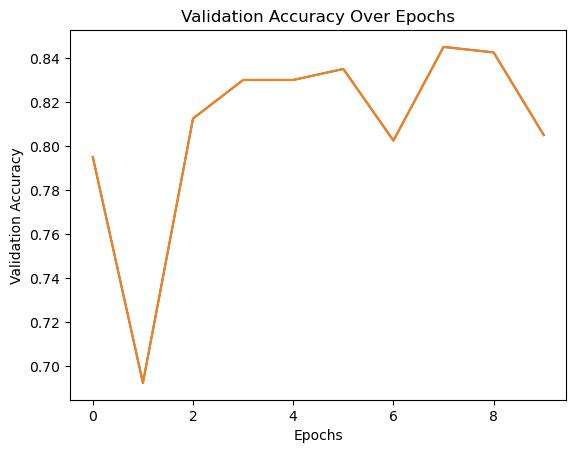

In [34]:
import matplotlib.pyplot as plt
print(history.history.keys())
plt.plot(history.history['val_accuracy'])
# Plot validation accuracy
plt.plot(history.history['val_accuracy'])
plt.xlabel('Epochs')
plt.ylabel('Validation Accuracy')
plt.title('Validation Accuracy Over Epochs')
plt.show()

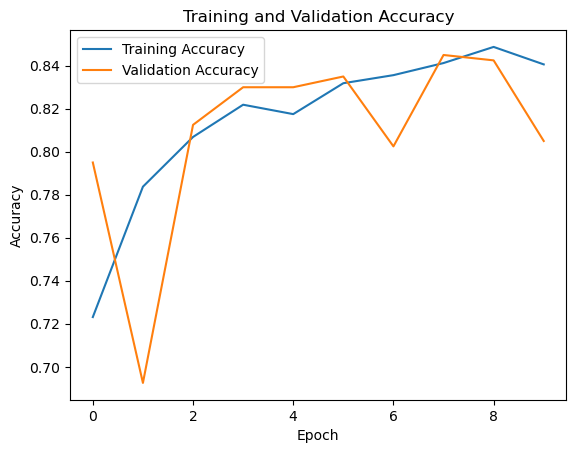

In [35]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()